### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3

#### Дисциплина: Интеллектуальный анализ данных

## Москва 2022

### Вариант № 13

# 1.	Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlopen
from contextlib import closing
import numpy as np
import pandas as pd
import warnings
import numpy as np
import numpy as np
from sklearn import metrics
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics.cluster import contingency_matrix

,3,19,22
0,38.9,6.5,2.0
1,37.2,5.5,2.0
2,38.6,9.1,1.0
3,37.4,NaN,2.0
4,NaN,7.7,1.0


In [ ]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
from sklearn.metrics.cluster import fowlkes_mallows_score
warnings.filterwarnings("ignore")
import numpy as np

def plot_cluster(X,y):
    plt.figure(figsize=(12,10))
    clusters = np.unique(y)
    for cluster in clusters:
        row_ix = np.where(y == cluster)
        plt.scatter(X[row_ix, 0], X[row_ix, 1],s=100, label = cluster)
    plt.title('ARRAY')
    plt.xlabel('WAT') 
    plt.ylabel('BAT')
    plt.legend()
    plt.grid(True)
    plt.show()
    
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
            TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
            FP += 1
        if y_actual[i]==y_pred[i]==0:
            TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
            FN += 1

    return(TP, FP, TN, FN)
warnings.filterwarnings("ignore")

In [ ]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data"
massiv = pd.read_csv(url, header=None, na_values="?", sep=' ', skiprows=(48))
massiv=massiv[[3,19,22]]
massiv.head()

# 2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения того класса, к которому относится запись с пропущенным значением в признаке.


In [2]:
massiv[3] = massiv[3].fillna(massiv[3].median())
massiv[19] = massiv[19].fillna(massiv[19].median())
massiv.isna().sum()

3     0
19    0
22    1
dtype: int64

In [3]:
massiv.dropna(inplace=True)
massiv.isna().sum()

3     0
19    0
22    0
dtype: int64

# 3.Если количество различных меток класса больше пяти, то объедините некоторые (наименее многочисленные) классы, чтобы общее количество классов не превышало пять.

In [4]:
massiv[22].value_counts()

1.0    149
2.0     65
3.0     37
Name: 22, dtype: int64

In [5]:
massiv[22] = massiv[22].apply(lambda x:0 if x==3 else x)
massiv[22].value_counts()

1.0    149
2.0     65
0.0     37
Name: 22, dtype: int64

# 4.	Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 


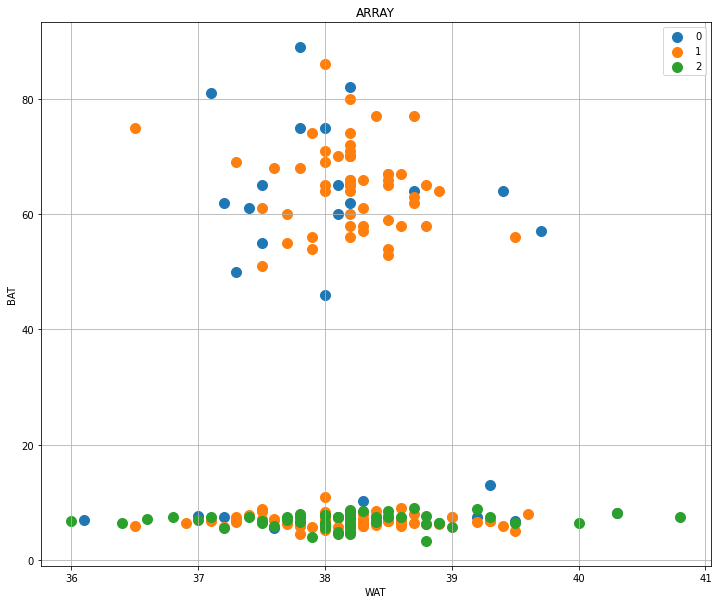

In [6]:
X = massiv[[3,19]].astype(float)
y = massiv[22].astype(int)
plot_cluster(X.values,y)

# 5.	Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените аргументы по умолчанию или используйте для кластеризации случайную выборку из набора данных.


In [7]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X)
a = model.predict(X)
from sklearn.cluster import Birch
model = Birch(threshold=0.01, n_clusters=3)
model.fit(X)
b = model.predict(X)
from sklearn.cluster import OPTICS
model = OPTICS(eps=0.20, min_samples=10)
c = model.fit_predict(X)
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=3)
d = model.fit_predict(X)

# 6.	Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу сопряженности, используя функцию `contingency_matrix()` из scikit-learn, и найдите значения мер качества кластеризации, указанные в индивидуальном задании.  


In [8]:
contingency_matrix(y, a),contingency_matrix(y, b),contingency_matrix(y, c),contingency_matrix(y, d)

(array([[19, 13,  5],
        [97, 34, 18],
        [65,  0,  0]], dtype=int64),
 array([[13, 19,  5],
        [45, 97,  7],
        [ 0, 65,  0]], dtype=int64),
 array([[ 25,   0,   4,   3,   5],
        [110,   9,   9,   7,  14],
        [ 46,   4,  12,   3,   0]], dtype=int64),
 array([[ 34,   1,   2],
        [147,   1,   1],
        [ 65,   0,   0]], dtype=int64))

In [9]:
purity_score(y, a),purity_score(y, b),purity_score(y, c),purity_score(y, d)

(0.5936254980079682,
 0.5936254980079682,
 0.6055776892430279,
 0.5976095617529881)

In [10]:
fowlkes_mallows_score(y, a),fowlkes_mallows_score(y, b),fowlkes_mallows_score(y, c),fowlkes_mallows_score(y, d)

(0.49482005883300473,
 0.5083610636588063,
 0.49843705605549693,
 0.6563959886500642)

In [11]:
perf_measure(y.values, a),perf_measure(y.values, b),perf_measure(y.values, c),perf_measure(y.values, d)

((34, 13, 19, 162), (97, 84, 13, 45), (9, 16, 0, 13), (1, 1, 34, 212))

# 7.	Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании.


In [12]:
print ('\n', purity_score(y, c))


 0.6055776892430279


# 8.	Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте области принятия решения и набор данных в виде точек на плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

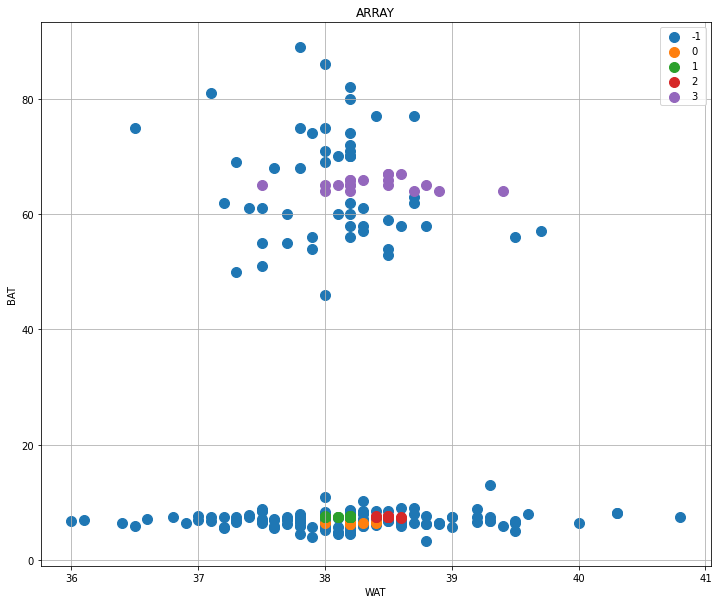

In [13]:
plot_cluster(X.values,c)